# DataFrame Netflix

#### Importando o pandas

In [6]:
import pandas as pd

  O conjunto de dados fornece um instantâneo de uma base de usuários da Netflix, mostrando vários aspectos das assinaturas de usuários, detalhes da conta e atividade. Cada linha representa um usuário único, identificado pelo seu ID de usuário. O conjunto de dados inclui informações como o tipo de assinatura do usuário (Básico, Padrão ou Premium), a data em que eles aderiram à Netflix (data de contato), a data de seu último pagamento (última data de pagamento) e o país em que estão localizados.
  Coluna incluídas para fornecer insights sobre o comportamento e as preferências do usuário. Essa coluna inclue o tipo de dispositivo (por exemplo, Smart TV, Mobile, Desktop, Tablet). O conjunto de dados serve como uma representação sintética e não reflete os dados reais do usuário Netflix. Ele pode ser usado para análise e modelagem para entender as tendências, preferências e geração de receita do usuário dentro de uma hipotética base de usuários da Netflix.

#### Importando base de dados

In [7]:
planosDf = pd.read_csv("Netflix Userbase.csv")
display(planosDf)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


#### Removendo colunas que não vou usar
    -Deixando apenas:
    -ID do usuário;
    -Tipo de assinatura: Dado categórico;
    -Países: Dado categórico;
    -Idade: Dado númerico;
    -Gênero: Dado categórico;
    -Dispositivo: Dado categórico;

In [8]:
planosDf = planosDf.drop('Join Date', axis=1)
planosDf = planosDf.drop('Monthly Revenue', axis=1)
planosDf = planosDf.drop('Last Payment Date', axis=1)
planosDf = planosDf.drop('Plan Duration', axis=1)
display(planosDf)

,User ID,Subscription Type,Country,Age,Gender,Device
0,1,Basic,United States,28,Male,Smartphone
1,2,Premium,Canada,35,Female,Tablet
2,3,Standard,United Kingdom,42,Male,Smart TV
3,4,Standard,Australia,51,Female,Laptop
4,5,Basic,Germany,33,Male,Smartphone
...,...,...,...,...,...,...
2495,2496,Premium,Spain,28,Female,Smart TV
2496,2497,Basic,Spain,33,Female,Smart TV
2497,2498,Standard,United States,38,Male,Laptop
2498,2499,Standard,Canada,48,Female,Tablet


#### Tabela de frequência das idades dos assinantes da Netflix - Dado númerico

In [9]:
frequenciaDfNumerico = planosDf['Age'].value_counts().reset_index()
frequenciaDfNumerico.columns = ['Age', 'Frequência']
frequenciaDfNumerico = frequenciaDfNumerico.sort_values(by='Age')
frequenciaDfNumerico['Frequência Acumulada'] = frequenciaDfNumerico['Frequência'].cumsum()
totalObservacoes = len(planosDf)
frequenciaDfNumerico['Frequência Relativa'] = frequenciaDfNumerico['Frequência'] / totalObservacoes * 100
frequenciaDfNumerico['Frequência Relativa Acumulada'] = frequenciaDfNumerico['Frequência Relativa'].cumsum()
print(frequenciaDfNumerico.to_string(index=False))

 Age  Frequência  Frequência Acumulada  Frequência Relativa  Frequência Relativa Acumulada
  26           1                     1                 0.04                           0.04
  27          87                    88                 3.48                           3.52
  28         115                   203                 4.60                           8.12
  29         104                   307                 4.16                          12.28
  30         116                   423                 4.64                          16.92
  31         115                   538                 4.60                          21.52
  32          92                   630                 3.68                          25.20
  33          93                   723                 3.72                          28.92
  34          88                   811                 3.52                          32.44
  35         105                   916                 4.20                          36.64

#### Tabela de frequência dos dispositivos de acesso a Netflix - Dado categórico

In [10]:
frequenciaDfNumerico = planosDf['Device'].value_counts().reset_index()
frequenciaDfNumerico.columns = ['Device', 'Frequência']
frequenciaDfNumerico = frequenciaDfNumerico.sort_values(by='Device')
frequenciaDfNumerico['Frequência Acumulada'] = frequenciaDfNumerico['Frequência'].cumsum()
totalObservacoes = len(planosDf)
frequenciaDfNumerico['Frequência Relativa'] = frequenciaDfNumerico['Frequência'] / totalObservacoes * 100
frequenciaDfNumerico['Frequência Relativa Acumulada'] = frequenciaDfNumerico['Frequência Relativa'].cumsum()
print(frequenciaDfNumerico.to_string(index=False))

    Device  Frequência  Frequência Acumulada  Frequência Relativa  Frequência Relativa Acumulada
    Laptop         636                   636                25.44                          25.44
  Smart TV         610                  1246                24.40                          49.84
Smartphone         621                  1867                24.84                          74.68
    Tablet         633                  2500                25.32                         100.00


#### Tabela de frequência dos planos de assinatura da Netflix - Dado categórico

In [24]:
frequenciaDfNumerico = planosDf['Subscription Type'].value_counts().reset_index()
frequenciaDfNumerico.columns = ['Subscription Type', 'Frequência']
frequenciaDfNumerico = frequenciaDfNumerico.sort_values(by='Subscription Type')
frequenciaDfNumerico['Frequência Acumulada'] = frequenciaDfNumerico['Frequência'].cumsum()
totalObservacoes = len(planosDf)
frequenciaDfNumerico['Frequência Relativa'] = frequenciaDfNumerico['Frequência'] / totalObservacoes * 100
frequenciaDfNumerico['Frequência Relativa Acumulada'] = frequenciaDfNumerico['Frequência Relativa'].cumsum()
print(frequenciaDfNumerico.to_string(index=False))

Subscription Type  Frequência  Frequência Acumulada  Frequência Relativa  Frequência Relativa Acumulada
            Basic         999                   999                39.96                          39.96
          Premium         733                  1732                29.32                          69.28
         Standard         768                  2500                30.72                         100.00


## Gráficos

Um gráfico é uma representação visual de dados, utilizando elementos visuais como linhas, barras, pontos e setores para comunicar informações de forma clara e concisa. São ferramentas poderosas para apresentar dados complexos de maneira fácil de entender, permitindo identificar tendências, padrões e relações entre diferentes variáveis.

#### Importando o Matplotlib

In [16]:
import matplotlib.pyplot as plt

#### Gráfico pizza dos planos de assinatura da Netflix

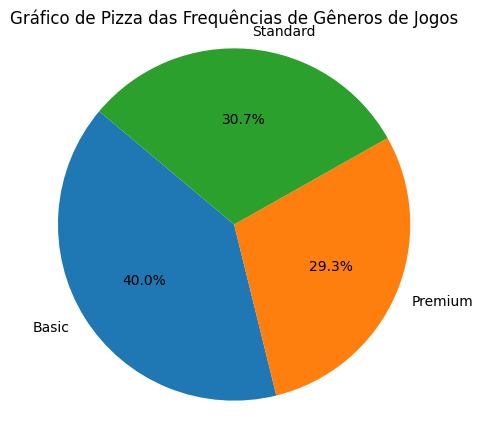

In [29]:
generos = ['Basic', 'Premium', 'Standard']
freqAbsoluta = [999, 733, 768]
plt.figure(figsize=(5, 5))
plt.pie(freqAbsoluta, labels=generos, autopct='%1.1f%%', startangle=140)
plt.title('Gráfico de Pizza das Frequências de Gêneros de Jogos')
plt.axis('equal')
plt.show()

#### Gráfico em barras do gênero dos assinantes e as suas respectivas idades médias

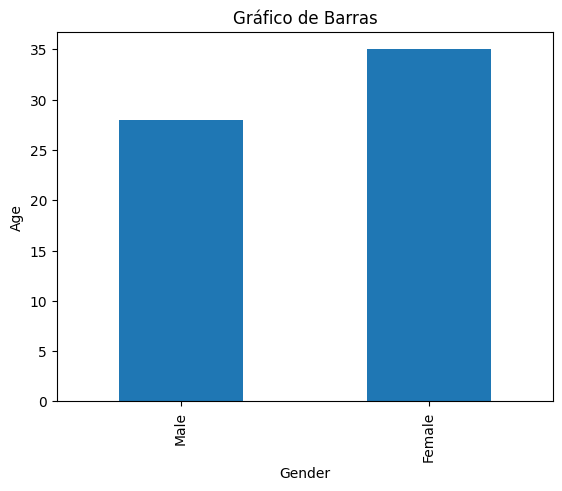

In [25]:
planosDf.head(2).plot(kind='bar', x='Gender', y='Age', legend=False)
plt.title('Gráfico de Barras')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

#### Gráfico pizza dos dispositivos de assinatura e as suas respectivas idades médias

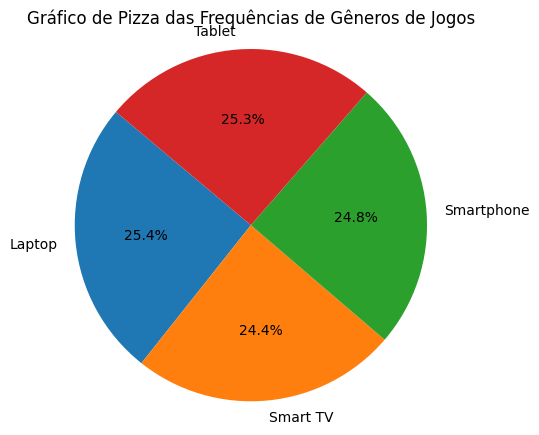

In [30]:
generos = ['Laptop', 'Smart TV', 'Smartphone', 'Tablet']
freqAbsoluta = [636, 610, 621, 633]
plt.figure(figsize=(5, 5))
plt.pie(freqAbsoluta, labels=generos, autopct='%1.1f%%', startangle=140)
plt.title('Gráfico de Pizza das Frequências de Gêneros de Jogos')
plt.axis('equal')
plt.show()

## Histogramas

Um histograma é uma representação gráfica em colunas ou barras que ilustra a distribuição de frequências de um conjunto de dados. É uma ferramenta útil para visualizar e analisar dados, pois permite observar a concentração de valores em diferentes intervalos.

#### Histograma dos planos assinantes

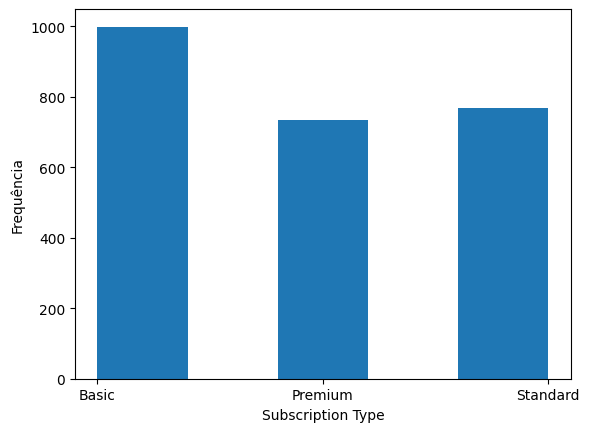

In [73]:
plt.hist(planosDf["Subscription Type"], bins=5)
plt.xlabel("Subscription Type")
plt.ylabel("Frequência")
plt.show()

#### Histograma dos países assinantes

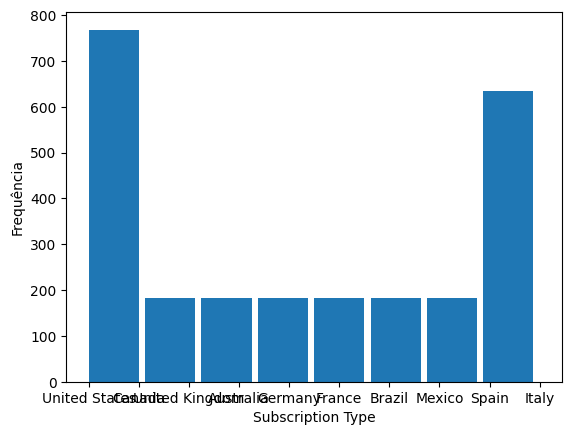

In [84]:
plt.hist(planosDf["Country"], bins=8, width=1)
plt.xlabel("Subscription Type")
plt.ylabel("Frequência")
plt.show()

#### Importando NumPy e Statistics

#### Calculando a média, moda e mediana da idade dos assinantes na Netflix

**Média**:
A média é uma medida de tendência central que representa o valor médio de um conjunto de dados.
Calcula-se somando todos os valores e dividindo pelo número total de observações.
A média é sensível a valores extremos, também conhecidos como outliers, pois eles podem afetar significativamente o resultado.
**Moda**:
A moda é o valor que aparece com maior frequência em um conjunto de dados.
Pode haver conjuntos de dados unimodais (um valor de moda), bimodais (dois valores de moda) ou multimodais (mais de dois valores de moda).
A moda é útil para identificar os valores mais frequentes em um conjunto de dados.
**Mediana**:
A mediana é o valor que divide o conjunto de dados ao meio quando eles estão organizados em ordem crescente ou decrescente.
É menos sensível a valores extremos do que a média, tornando-a uma medida de tendência central mais robusta em certos casos.
A mediana é particularmente útil quando se lida com conjuntos de dados com valores extremos que podem distorcer a média.

In [85]:
import numpy as np
from statistics import mode, median

In [86]:
media = np.mean(planosDf['Age'])
moda = mode(planosDf['Age'])
mediana = median(planosDf['Age'])
print("Media : ", media)
print("Mediana : ", mediana)
print("Moda : ", moda)

Media :  38.7956
Mediana :  39.0
Moda :  39
